In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [25]:
train_df = pd.DataFrame.from_csv('train.tsv', sep='\t')

In [26]:
train_df.head()

,SentenceId,Phrase,Sentiment
PhraseId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,1,A series of escapades demonstrating the adage ...,2
3,1,A series,2
4,1,A,2
5,1,series,2


In [17]:
train_df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156060 entries, 1 to 156060
Data columns (total 3 columns):
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(2), object(1)
memory usage: 9.8+ MB


In [20]:
train_df.describe()

,SentenceId,Sentiment
count,156060.000000,156060.000000
mean,4079.732744,2.063578
std,2502.764394,0.893832
min,1.000000,0.000000
25%,1861.750000,2.000000
50%,4017.000000,2.000000
75%,6244.000000,3.000000
max,8544.000000,4.000000


In [32]:
train_df['text length'] = train_df['Phrase'].apply(lambda line: len(line.split()))

In [145]:
train_df.head()

,SentenceId,Phrase,Sentiment,text length
PhraseId,,,,
1,1,A series of escapades demonstrating the adage ...,1,37
2,1,A series of escapades demonstrating the adage ...,2,14
3,1,A series,2,2
4,1,A,2,1
5,1,series,2,1


In [36]:
sentiment =  train_df.groupby('Sentiment').mean()

In [37]:
sentiment.corr()

,SentenceId,text length
SentenceId,1.000000,0.924146
text length,0.924146,1.000000


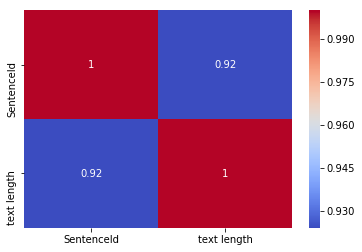

In [38]:
sns.heatmap(sentiment.corr(), cmap='coolwarm', annot=True)

In [40]:
review_class = train_df[(train_df.Sentiment == 0) | (train_df.Sentiment == 4) ]

In [137]:
X = review_class['Phrase']
Y = review_class['Sentiment']

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [45]:
review_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16278 entries, 64 to 156011
Data columns (total 4 columns):
SentenceId     16278 non-null int64
Phrase         16278 non-null object
Sentiment      16278 non-null int64
text length    16278 non-null int64
dtypes: int64(3), object(1)
memory usage: 635.9+ KB


In [138]:
X = cv.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3)

In [140]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [141]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [142]:
predictions = nb.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix,classification_report

In [144]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1957  153]
 [ 166 2608]]


             precision    recall  f1-score   support

          0       0.92      0.93      0.92      2110
          4       0.94      0.94      0.94      2774

avg / total       0.93      0.93      0.93      4884



In [64]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [65]:
from sklearn.pipeline import Pipeline

In [69]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [132]:
X = review_class['Phrase']
Y = review_class['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3)

In [133]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [134]:
predictions = pipeline.predict(X_test)

In [135]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1847  236]
 [ 114 2687]]
             precision    recall  f1-score   support

          0       0.94      0.89      0.91      2083
          4       0.92      0.96      0.94      2801

avg / total       0.93      0.93      0.93      4884

